# EDA 과제 3. 세계 테러 데이터 분석

In [2]:
import pandas as pd

terror_raw = pd.read_csv("./globalterrorismdb_0718dist.csv", encoding='ISO-8859-1', low_memory=False)

terror_raw.rename(
	columns={
		'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'latitude': 'lat', 'longitude': 'lng',
  		'country_txt': 'Country', 'region_txt': 'Region', 'city': 'City',
		'targtype1_txt': 'target_type', 'target1': 'target',
  		'gname': 'perp_group', 'attacktype1_txt': 'attack_type', 'weaptype1_txt': 'weapon'
	}, inplace=True
)

columns = [
	'year', 'month', 'day', 'Region', 'Country', 'City', 'lat', 'lng', 'nkill', 'nwound',
	'target_type', 'target', 'perp_group', 'attack_type', 'weapon', 'suicide', 'success'
]
terror_raw = terror_raw[columns]
terror_raw.head()

,year,month,day,Region,Country,City,lat,lng,nkill,nwound,target_type,target,perp_group,attack_type,weapon,suicide,success
0,1970,7,2,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,1.0,0.0,Private Citizens & Property,Julio Guzman,MANO-D,Assassination,Unknown,0,1
1,1970,0,0,North America,Mexico,Mexico city,19.371887,-99.086624,0.0,0.0,Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Hostage Taking (Kidnapping),Unknown,0,1
2,1970,1,0,Southeast Asia,Philippines,Unknown,15.478598,120.599741,1.0,0.0,Journalists & Media,Employee,Unknown,Assassination,Unknown,0,1
3,1970,1,0,Western Europe,Greece,Athens,37.997490,23.762728,NaN,NaN,Government (Diplomatic),U.S. Embassy,Unknown,Bombing/Explosion,Explosives,0,1
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,NaN,NaN,Government (Diplomatic),U.S. Consulate,Unknown,Facility/Infrastructure Attack,Incendiary,0,1


In [3]:
terror_raw.loc[terror_raw['nkill'].isnull(), 'nkill'] = 0
terror_raw.loc[terror_raw['nwound'].isnull(), 'nwound'] = 0
terror_raw['casualties'] = terror_raw['nkill'] + terror_raw['nwound']

In [4]:
terror = terror_raw.copy()

In [5]:
terror.isna().sum()

year              0
month             0
day               0
Region            0
Country           0
City            435
lat            4556
lng            4557
nkill             0
nwound            0
target_type       0
target          638
perp_group        0
attack_type       0
weapon            0
suicide           0
success           0
casualties        0
dtype: int64

In [6]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   year         181691 non-null  int64  
 1   month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Region       181691 non-null  object 
 4   Country      181691 non-null  object 
 5   City         181256 non-null  object 
 6   lat          177135 non-null  float64
 7   lng          177134 non-null  float64
 8   nkill        181691 non-null  float64
 9   nwound       181691 non-null  float64
 10  target_type  181691 non-null  object 
 11  target       181053 non-null  object 
 12  perp_group   181691 non-null  object 
 13  attack_type  181691 non-null  object 
 14  weapon       181691 non-null  object 
 15  suicide      181691 non-null  int64  
 16  success      181691 non-null  int64  
 17  casualties   181691 non-null  float64
dtypes: float64(5), int64(5),

In [5]:
terror[['nkill', 'nwound', 'casualties']] = terror[['nkill', 'nwound', 'casualties']].astype('int64')

In [7]:
terror['success'].value_counts()

success
1    161632
0     20059
Name: count, dtype: int64

In [8]:
terror['success'].value_counts()[0], terror['success'].value_counts()[1]

(20059, 161632)

In [9]:
len(terror['success'])

181691

In [10]:
terror['success'].value_counts()[1] / len(terror['success']) * 100

88.95982739926579

In [12]:
success_rate = round(terror['success'].value_counts()[1] / len(terror['success']) * 100, 0)
print(f" 1970-2017 기간 동안 전 세계 테러 발생 건수는 {len(terror)}건 이었고, 테러 성공률은 {success_rate}% 로 상당히 높은 편이다.")

 1970-2017 기간 동안 전 세계 테러 발생 건수는 181691건 이었고, 테러 성공률은 89.0% 로 상당히 높은 편이다.


-----

<br></br>

# 문제 1.

- 먼저 데이터의 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화하시오.

- 시각화를 해보면 전세계 테러는 어떤 특정 연도를 기점으로 갑자기 급격히 증가합니다.</br>
  이 구간을 특정짓고 그 “기점”에 세계적 이슈가 무엇이 있었는지를 추측해보세요.

- 단, 위 추측은 현단계에서는 단지 아직은 “상상”일 뿐입니다.

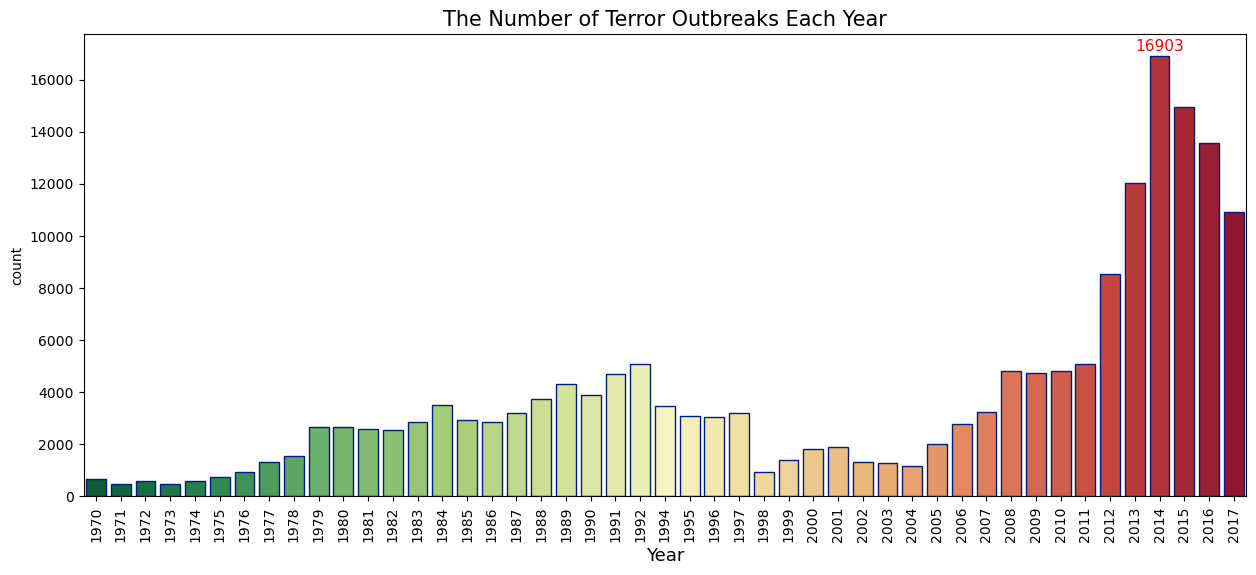

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.countplot(data=terror, x='year', hue='year', legend=False, palette='RdYlGn_r', edgecolor=sns.color_palette('dark'))
plt.text(
	x=43, y=terror['year'].value_counts()[2014]+200, 
 	s=str(terror['year'].value_counts()[2014]), 
  	ha='center', color='red', fontsize=11
)
plt.xticks(rotation=90)
plt.xlabel('Year', fontsize=13)
plt.title('The Number of Terror Outbreaks Each Year', fontsize=15)
plt.show()

#### 👉 2014년에 테러가 급증했다.

- 그렇다면 어느 지역에서 갑자기 테러가 급증했는지 알아보자.

In [14]:
terror_region = pd.crosstab(terror.year, terror.Region)
styled_df = terror_region.style.apply(lambda x: ['background-color: Yellow' if i == 2014 else '' for i in x.index], axis=0)
styled_df

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


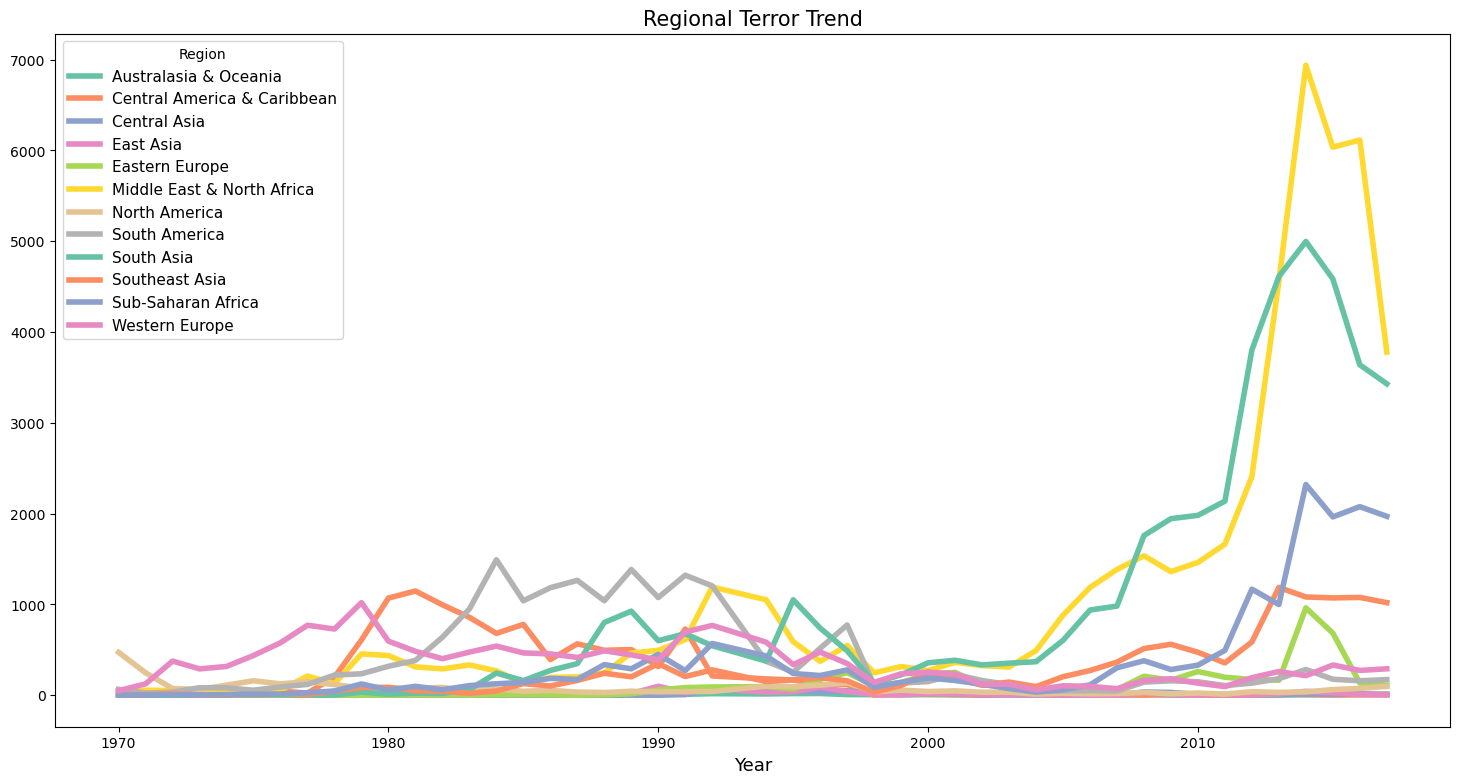

In [15]:
terror_region.plot(color=sns.color_palette('Set2'), lw=4)
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.legend(title='Region', fontsize=11)
plt.title("Regional Terror Trend", fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.show()

#### 👉 Middle East & North Africa와 South Asia 지역에서 테러 발생 급증

- 2014년에는 시리아 내전이 여전히 진행 중이었고 이라크, 시리아뿐만 아니라 다른 중동 지역에서도 불안정이 계속되었다. </br>
	이러한 중동 지역의 불안정한 상황은 이슬람국가의 IS, ISIS, ISIL와 같은 다양한 극단주의 세력들이 영향력을 키우는 데 주요한 요인이 되었다.

- 2014년에 이슬람국가(IS, ISIL)가 이라크와 시리아 일부 지역을 점령하고 국제적으로 활동을 확대하면서, 그들의 테러 활동도 증가했다.<br>
	IS의 성장은 중동 지역 전반의 안정을 위협했고, 세계 각지에서 테러 공격을 조장했습니다.

- 이때 유럽의 이슬람 테러리즘 활동이 시작되었고 2014년부터 계속 이어지고 있다.</br>
	유럽에서 테러가 급증한 것은 시리아 내전의 여파로 분류되며 ISIL의 성장과 관련이 있는 것으로 여겨진다.

- 이 기간 중 사하라 이남 아프리카에서는 테러발생 건수가 114 건에서 2,308건으로 거의 20배 이상 증가하여 이 기간 중 테러발생 건수의 증가가 가장 높은 지역이
되었다.

-----

<br></br>

# 문제 2.

- 전 세계 테러 데이터를 가지고, 테러가 많이 일어난 국가를 정렬해서 상위 10위의 국가를 시각화하세요.

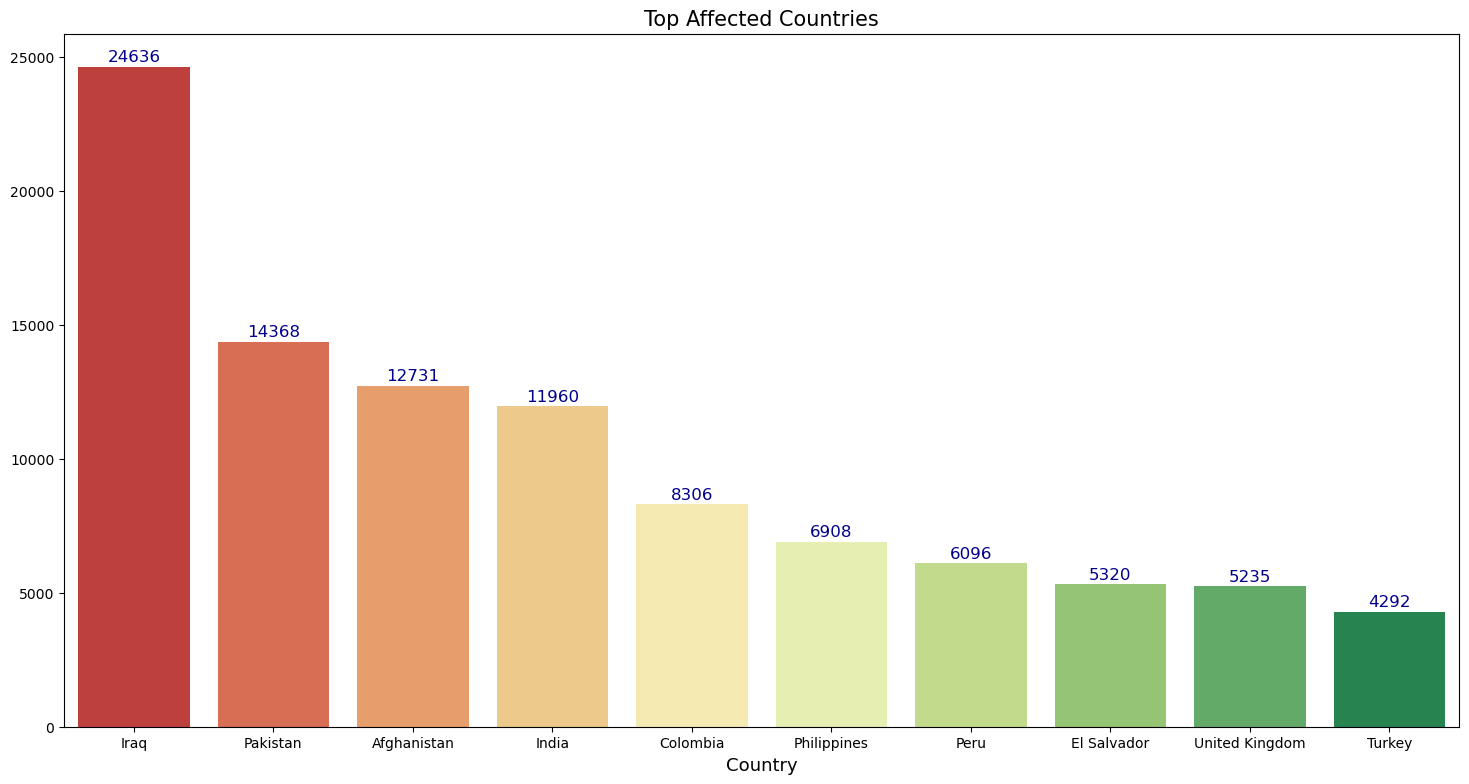

In [16]:
plt.figure(figsize=(18,9))
countries = terror['Country'].value_counts()[:10].index
ax = sns.barplot(
	x=countries, y=terror['Country'].value_counts()[:10].values,
	hue=countries, legend=False, palette='RdYlGn'
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 7), textcoords='offset points',
		fontsize=12, color='darkblue'
	)
plt.title('Top Affected Countries', fontsize=15)
plt.xlabel("Country", fontsize=13)
plt.show()

#### 👉 이라크에서 가장 많은 테러가 발생했다.

- 그 다음으로 많은 테러가 발생한 국가가 파키스탄, 아프가니스탄이다.

- 테러 발생 TOP3가 모두 중동 지역의 국가들이다.

-----

<br></br>

# 문제 3.

- 문제2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.

- 만약 국가별로 다른 국가와 사망자수, 부상자수의 특성이 다른 국가들이 있다면 시각화에 신경을 쓰세요.

- 즉, 어떤 국가는 테러횟수와 사상자(사망자수+부상자수)가 비슷한 경우가 있고, 또 어떤 국가는 테러횟수에 비해 사상자수가 많은 경우가 있을 겁니다

### 🔰 TOP10 국가별 테러 발생 vs 사상자 수

- 먼저 테러 발생 건수와 사상자의 수를 비교해 보면 좋을 것 같다.

In [17]:
TOP10_Country = terror['Country'].value_counts()[:10].to_frame()
TOP10_Country.columns = ['Attacked Count']
TOP10_Country

,Attacked Count
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


In [18]:
count_kill = terror.groupby('Country')['nkill'].sum().to_frame()
count_kill.columns = ["Killed Count"]
count_kill

,Killed Count
Country,
Afghanistan,39384
Albania,42
Algeria,11066
Andorra,0
Angola,3043
...,...
Yemen,8776
Yugoslavia,119
Zaire,324


In [19]:
count_wound = terror.groupby('Country')['nwound'].sum().to_frame()
count_wound.columns = ['Wounded Count']
count_wound

,Wounded Count
Country,
Afghanistan,44277
Albania,126
Algeria,9150
Andorra,0
Angola,2455
...,...
Yemen,9328
Yugoslavia,281
Zaire,211


In [20]:
cnt_kill_wound = count_kill.merge(count_wound, left_index=True, right_index=True, how='left')
cnt_kill_wound

,Killed Count,Wounded Count
Country,,
Afghanistan,39384,44277
Albania,42,126
Algeria,11066,9150
Andorra,0,0
Angola,3043,2455
...,...,...
Yemen,8776,9328
Yugoslavia,119,281
Zaire,324,211


In [21]:
TOP10_Casualties = TOP10_Country.merge(cnt_kill_wound, left_index=True, right_index=True, how='left')
TOP10_Casualties['Num of Casualties'] = TOP10_Casualties['Killed Count'] + TOP10_Casualties['Wounded Count']
TOP10_Casualties

,Attacked Count,Killed Count,Wounded Count,Num of Casualties
Country,,,,
Iraq,24636,78589,134690,213279
Pakistan,14368,23822,42038,65860
Afghanistan,12731,39384,44277,83661
India,11960,19341,28980,48321
Colombia,8306,14698,10328,25026
Philippines,6908,9559,13367,22926
Peru,6096,12771,4078,16849
El Salvador,5320,12053,5062,17115
United Kingdom,5235,3410,6106,9516


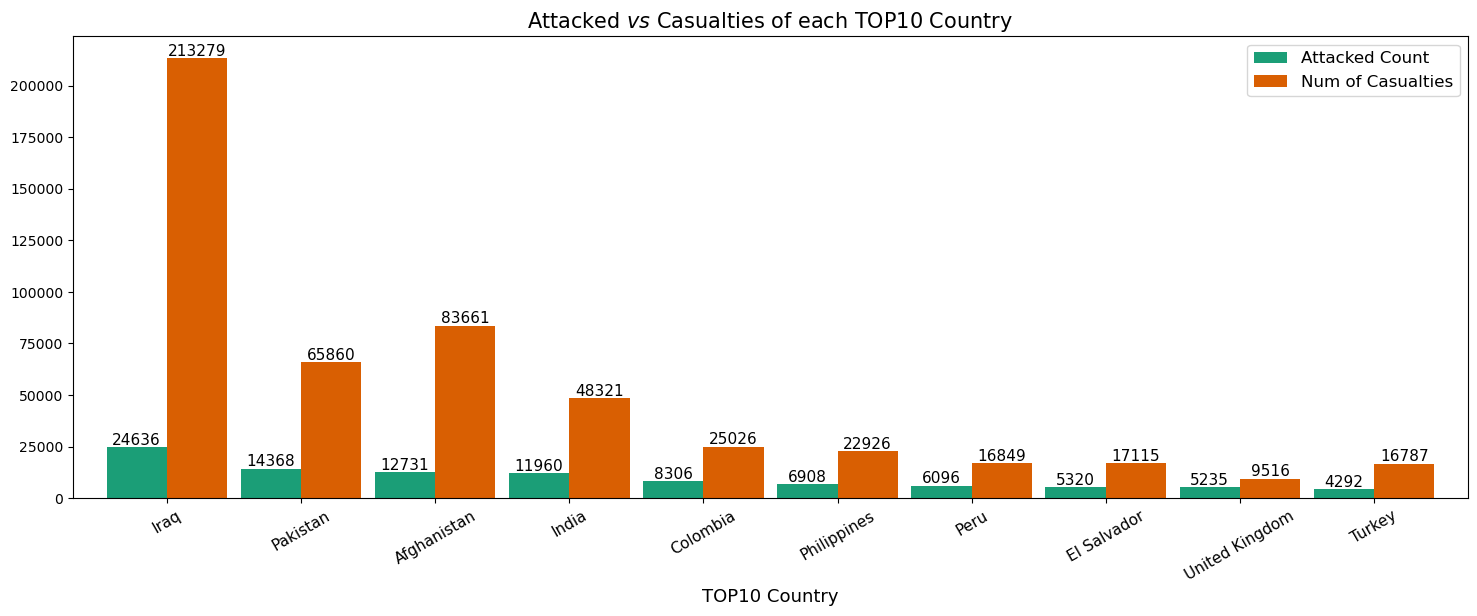

In [41]:
ax = TOP10_Casualties[['Attacked Count','Num of Casualties']].plot.bar(width=0.9, color=sns.color_palette('Dark2'))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title("Attacked $vs$ Casualties of each TOP10 Country", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("TOP10 Country", fontsize=13)
plt.xticks(rotation=30, fontsize=11)
plt.show()

#### 👉 와~~~

- 이라크의 사상자 수는 테러 발생건에 비해 거의 10배 정도 더 많았다.

- 아프가니스탄도 거의 8배 더 높은 수치의 사상자가 발생했고, 파키스탄이나 인도도 대략 4.5배 더 많았다.

- 그만큼 민간인 사상자가 많았다는 의미일까??? 그럼 어떤 공격 형태에서 가장 많은 사상자가 나는 걸까???

- 나라별 사망자 수와 부상자 수로 세분화하여 일단 살펴보자.<br></br>

### 🔰 TOP10 국가별 사망자 수 vs 부상자 수

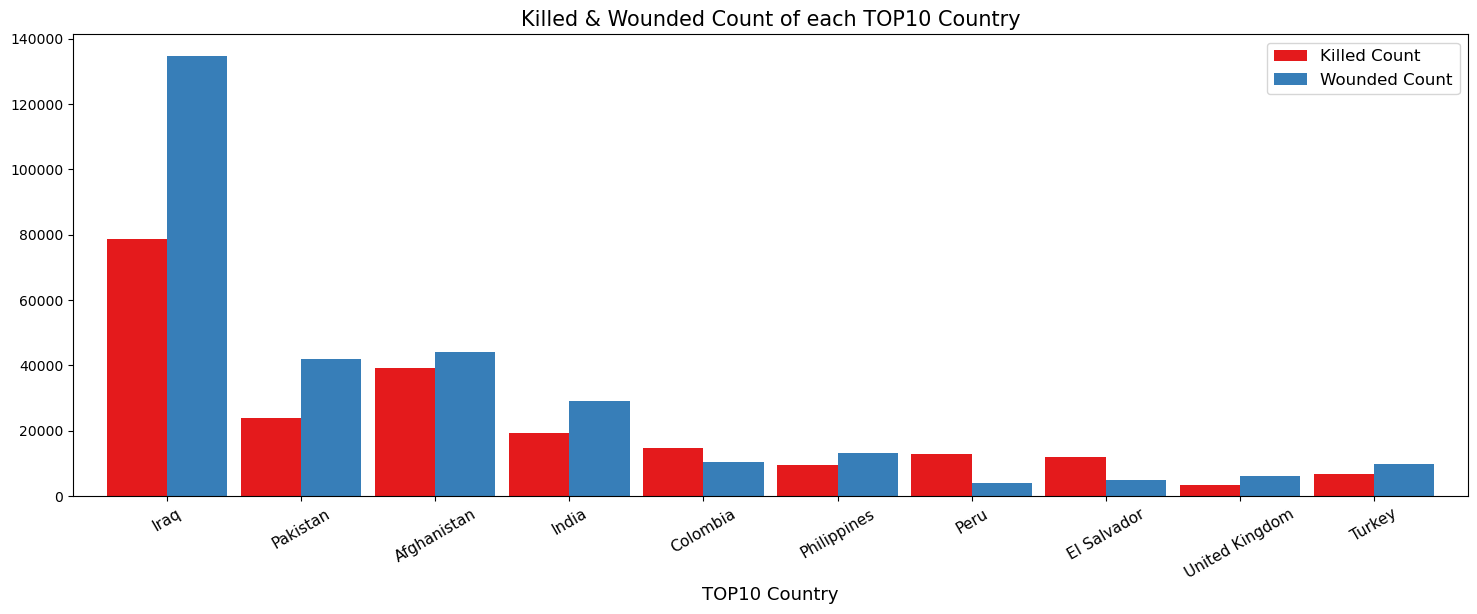

In [42]:
TOP10_Casualties[['Killed Count','Wounded Count']].plot.bar(width=0.9, color=sns.color_palette('Set1'))
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title("Killed & Wounded Count of each TOP10 Country", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("TOP10 Country", fontsize=13)
plt.xticks(rotation=30, fontsize=11)
plt.show()

#### 👉 사망자의 수가 유독 많은 국가가 있다.

- 이라크가 테러 발생 건수와 비례하여 가장 높은 사망자 수와 부상자 수를 보이고 있다.

- 페루와 엘살바도르는 사망자의 수가 부상자에 비해 상대적으로 높게 나타나고 있다. 

	그 이유가 뭘까? </br>
	공격 타입에 따른 사상자 수와 이 두 국가에서 발생한 테러의 공격 타입을 좀 더 살펴보면 좋을 것 같다. <br></br>


### 🔰 TOP10 국가별 공격 형태 vs 사상자 수

In [27]:
attack_type = terror['attack_type'].value_counts().to_frame()
attack_type.columns = ['Attack Count']
attack_type

,Attack Count
attack_type,
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


In [29]:
attack_casualties = terror.groupby('attack_type')['casualties'].sum().to_frame()
attack_casualties.columns = ['Casualties']
attack_casualties

,Casualties
attack_type,
Armed Assault,237662
Assassination,38807
Bombing/Explosion,530007
Facility/Infrastructure Attack,7407
Hijacking,20719
Hostage Taking (Barricade Incident),8444
Hostage Taking (Kidnapping),30677
Unarmed Assault,14907
Unknown,47106


In [31]:
attack_type_casualties = attack_type.merge(attack_casualties, left_index=True, right_index=True, how='left')
attack_type_casualties

,Attack Count,Casualties
attack_type,,
Bombing/Explosion,88255,530007
Armed Assault,42669,237662
Assassination,19312,38807
Hostage Taking (Kidnapping),11158,30677
Facility/Infrastructure Attack,10356,7407
Unknown,7276,47106
Unarmed Assault,1015,14907
Hostage Taking (Barricade Incident),991,8444
Hijacking,659,20719


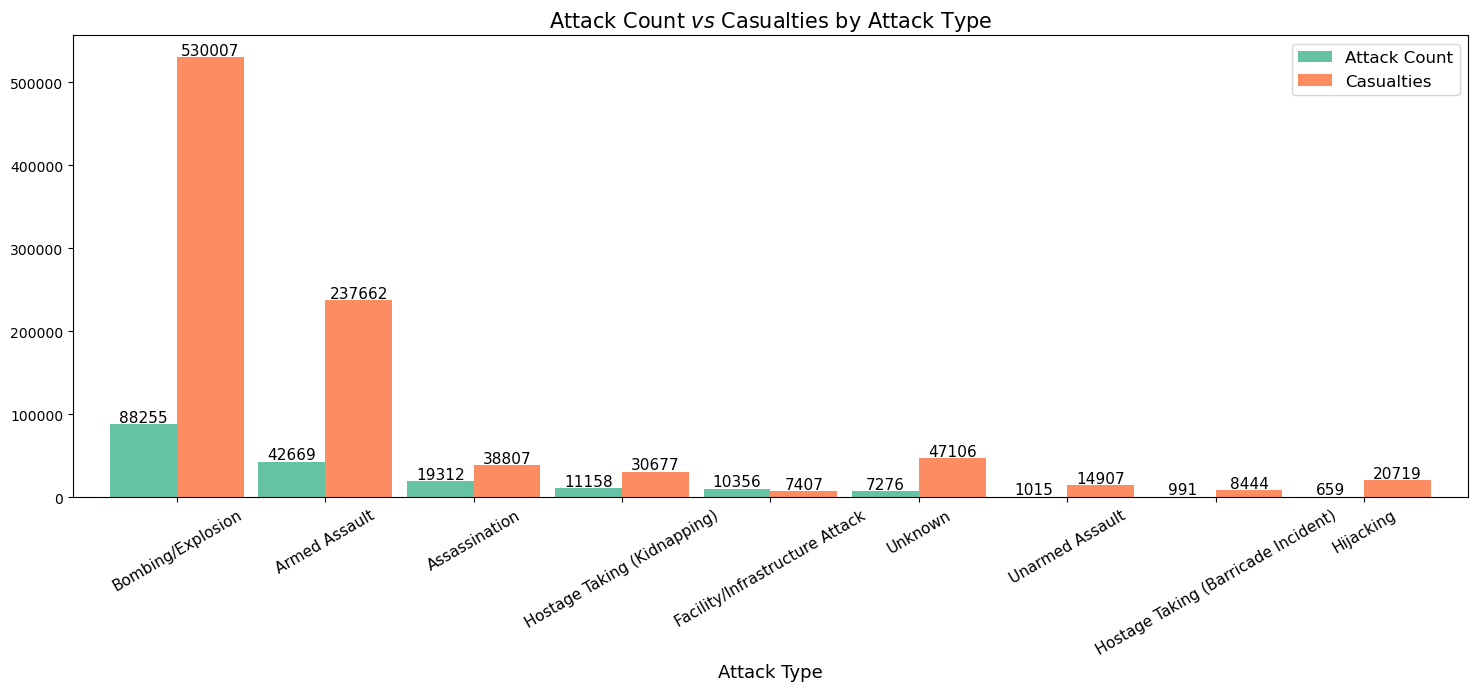

In [33]:
ax = attack_type_casualties.plot.bar(y=['Attack Count', 'Casualties'], width=0.9, color=sns.color_palette('Set2'))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)
fig = plt.gcf()
fig.set_size_inches(18,6)
plt.title("Attack Count $vs$ Casualties by Attack Type", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("Attack Type", fontsize=13)
plt.xticks(rotation=30, fontsize=11)
plt.show()

#### 👉 폭발물에 의한 사상자 수가 굉장히 높다.

- 폭탄과 같은 폭발물이나 무장 공격, 암살에 의한 사망자 수가 높다.

- 인질로 인한 사상자 수도 발생건에 비해 높은 비율을 나타내고 있다.

- 그럼 TOP10 국가 별 공격 타입을 한 번 살펴보자. <br></br>


### 🔰 TOP10 국가 별 공격 형태

In [35]:
top10_list = TOP10_Country.index.to_list()
top10_list

['Iraq',
 'Pakistan',
 'Afghanistan',
 'India',
 'Colombia',
 'Philippines',
 'Peru',
 'El Salvador',
 'United Kingdom',
 'Turkey']

In [36]:
attack_df = terror[terror['Country'].isin(top10_list)]
attack_df

,year,month,day,Region,Country,City,lat,lng,nkill,nwound,target_type,target,perp_group,attack_type,weapon,suicide,success,casualties
2,1970,1,0,Southeast Asia,Philippines,Unknown,15.478598,120.599741,1,0,Journalists & Media,Employee,Unknown,Assassination,Unknown,0,1,1
26,1970,1,21,Southeast Asia,Philippines,Quezon City,14.674280,121.057495,0,0,Government (Diplomatic),JUSMAG HQ,Unknown,Bombing/Explosion,Explosives,0,1,0
39,1970,1,31,Southeast Asia,Philippines,Bamban,15.675051,120.331618,0,1,Military,Seaman,New People's Army (NPA),Unknown,Unknown,0,0,1
96,1970,3,0,Southeast Asia,Philippines,Manila,14.596051,120.978666,0,0,Government (Diplomatic),U.S. Embassy,Unknown,Bombing/Explosion,Explosives,0,1,0
150,1970,3,24,Southeast Asia,Philippines,Angeles,15.153002,120.591942,1,0,Military,officer,Unknown,Unknown,Unknown,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181684,2017,12,31,South Asia,India,Hungrum,25.180162,93.015788,0,0,Government (General),Personal Security Officer of Council Member Ih...,Zeliangrong United Front,Hostage Taking (Kidnapping),Firearms,0,1,0
181685,2017,12,31,South Asia,Afghanistan,Maymana,35.921051,64.774544,0,4,Business,Jewelry Shop,Unknown,Bombing/Explosion,Explosives,0,1,4
181688,2017,12,31,Southeast Asia,Philippines,Kubentog,6.900742,124.437908,0,0,Private Citizens & Property,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Facility/Infrastructure Attack,Incendiary,0,1,0
181689,2017,12,31,South Asia,India,Imphal,24.798346,93.940430,0,0,Government (General),Office,Unknown,Bombing/Explosion,Explosives,0,0,0


In [38]:
country_attack_type = pd.crosstab(attack_df.Country, attack_df.attack_type)
country_attack_type

attack_type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Country,,,,,,,,,
Afghanistan,2877,954,6245,355,16,27,1011,73,1173
Colombia,1972,1343,3128,275,33,89,1058,14,394
El Salvador,2216,449,2055,194,0,117,154,1,134
India,3184,1229,4825,996,43,44,1184,143,312
Iraq,3155,1287,18286,154,13,24,946,6,765
Pakistan,3859,1406,7613,300,19,35,823,77,236
Peru,1328,1002,3115,223,8,74,97,4,245
Philippines,2158,1099,2213,452,34,53,602,4,293
Turkey,1289,437,1957,279,13,13,158,10,136


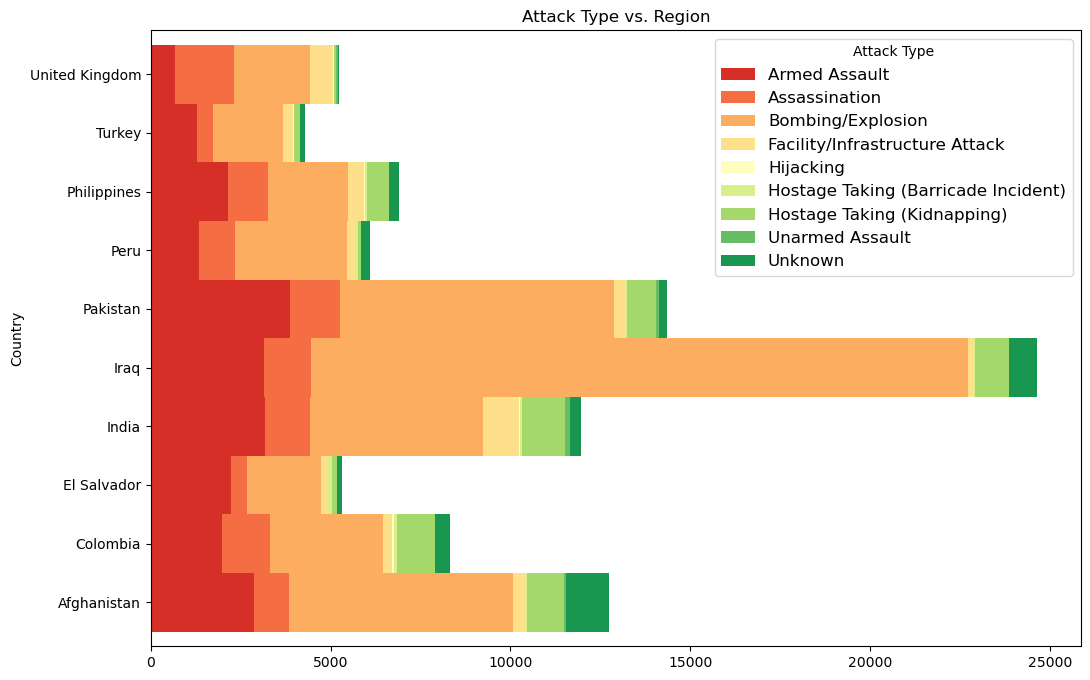

In [40]:
country_attack_type.plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn',9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.title('Attack Type vs. Region')
plt.legend(title='Attack Type', fontsize=12)
plt.show()

#### 👉 TOP3 Attack : 폭발물, 무장 공격, 암살

- 페루와 엘살바도르에 가해진 테러 공격 형태의 90% 정도가 사상자 수를 가장 많이 내는 TOP3의 공격이었다.

- 페루의 경우 폭발물 형태의 공격 형태가 대부분이여서 사망자의 수가 많았던 것 같다.

- 공격에 10배 이상의 사상자를 기록한 이라크의 경우에도 폭발물에 의한 공격의 거의 70% 이상 이었다.

-----

<br></br>

# 문제 4.

- 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여</br>
	각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인하세요.

- 여러분들은 데이터를 충분히 관찰하며서 신중하게 결과를 정리하세요.<br></br>

### 🔰 지역 별 테러 발생 건수 vs 사상자 수

- 일단 지역별로 얼마나 테러가 발생했고 또 얼마나 많이 죽고 다쳤는지 비교해서 확인해 본다.

In [80]:
cnt_region = terror['Region'].value_counts().to_frame()
cnt_region.columns = ['Attack Count']
cnt_region

,Attack Count
Region,
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456


In [50]:
cnt_casualties = terror.groupby('Region')['casualties'].sum().to_frame()
cnt_casualties.columns = ['Num of Casualties']
cnt_casualties.sort_values('Num of Casualties', ascending=False, inplace=True)
cnt_casualties

,Num of Casualties
Region,
Middle East & North Africa,351950
South Asia,242679
Sub-Saharan Africa,131242
South America,45553
Southeast Asia,41896
Central America & Caribbean,37699
North America,26447
Western Europe,25026
Eastern Europe,19460


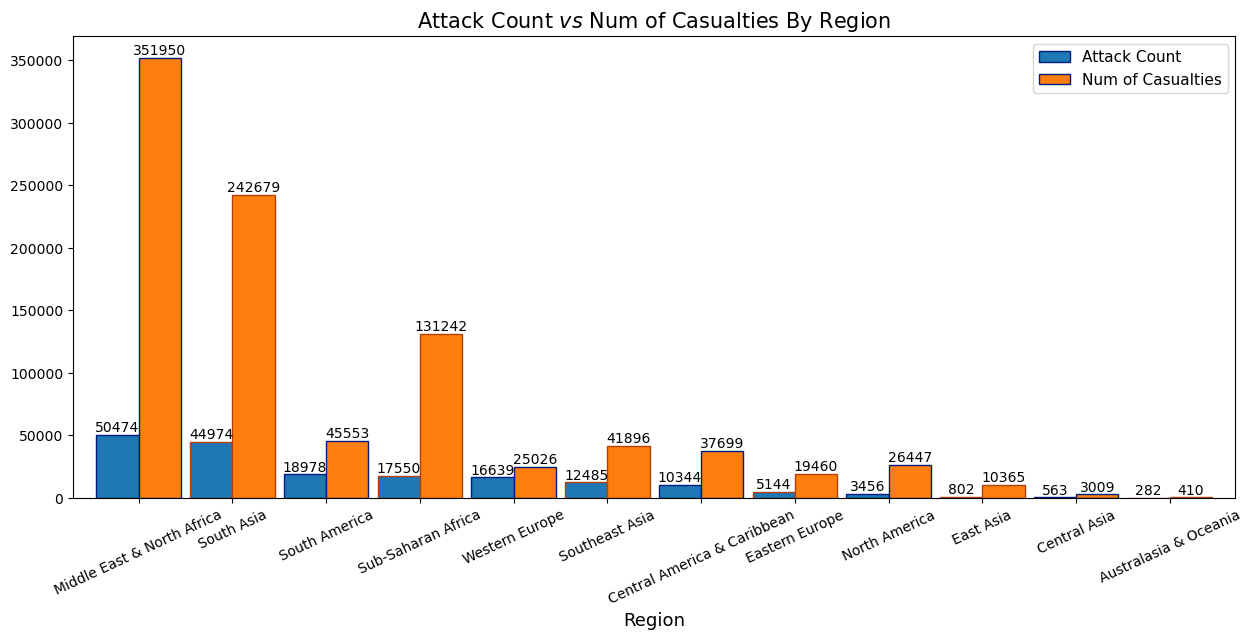

In [87]:
ax = cnt_region.merge(
	cnt_casualties, left_index=True, right_index=True, how='left'
).plot.bar(width=0.9, edgecolor=sns.color_palette('dark', 2))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2., p.get_height()),
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.title("Attack Count $vs$ Num of Casualties By Region", fontsize=15)
plt.legend(fontsize=11)
plt.xticks(rotation=25)
plt.xlabel('Region', fontsize=13)
plt.show()

#### 👉 사상자 수와 비교하니 발생 건수 수치가 거의 안보인다.

- 사상자 수에 비하면 테러 발생 건수는 상대적으로 아주 낮다.

- 지역별 테러 발생 건수만 따로 시각화 해보자.

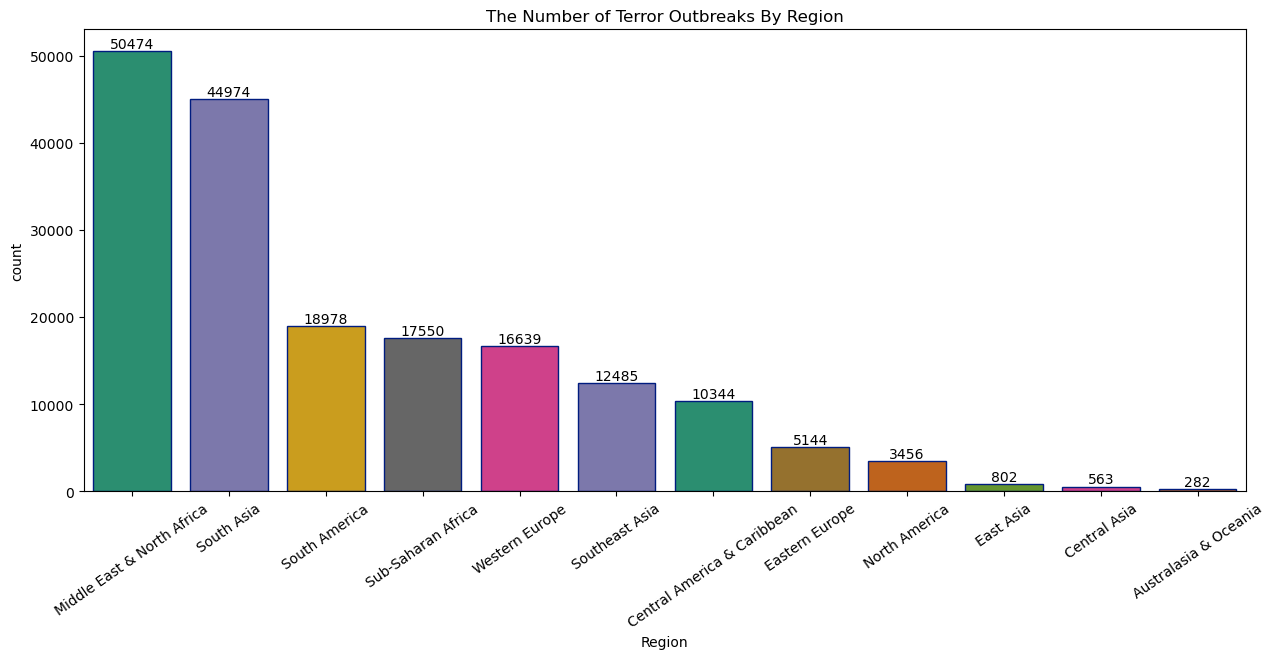

In [88]:
plt.figure(figsize=(15,6))
ax = sns.countplot(
	x='Region', data=terror, hue='Region', legend=False, palette='Dark2',
	edgecolor=sns.color_palette('dark'),
	order=terror['Region'].value_counts().index
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
plt.xticks(rotation=35)
plt.title('The Number of Terror Outbreaks By Region')
plt.show()

#### 👉 중동은 주요 테러 지역이다.

- Middle East & North Afraca와 South Asia의 테러 발생 수가 높은 것은 </br>
	맨 처음에 봤던 2014년의 해당 지역에 대한 테러의 급격한 증가와 관계가 있어 보인다.

C:\Users\happy\AppData\Local\Temp\ipykernel_22708\542177521.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(terror['Region'].value_counts().index,rotation=25)
C:\Users\happy\AppData\Local\Temp\ipykernel_22708\542177521.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(cnt_casualties.index,rotation=25)


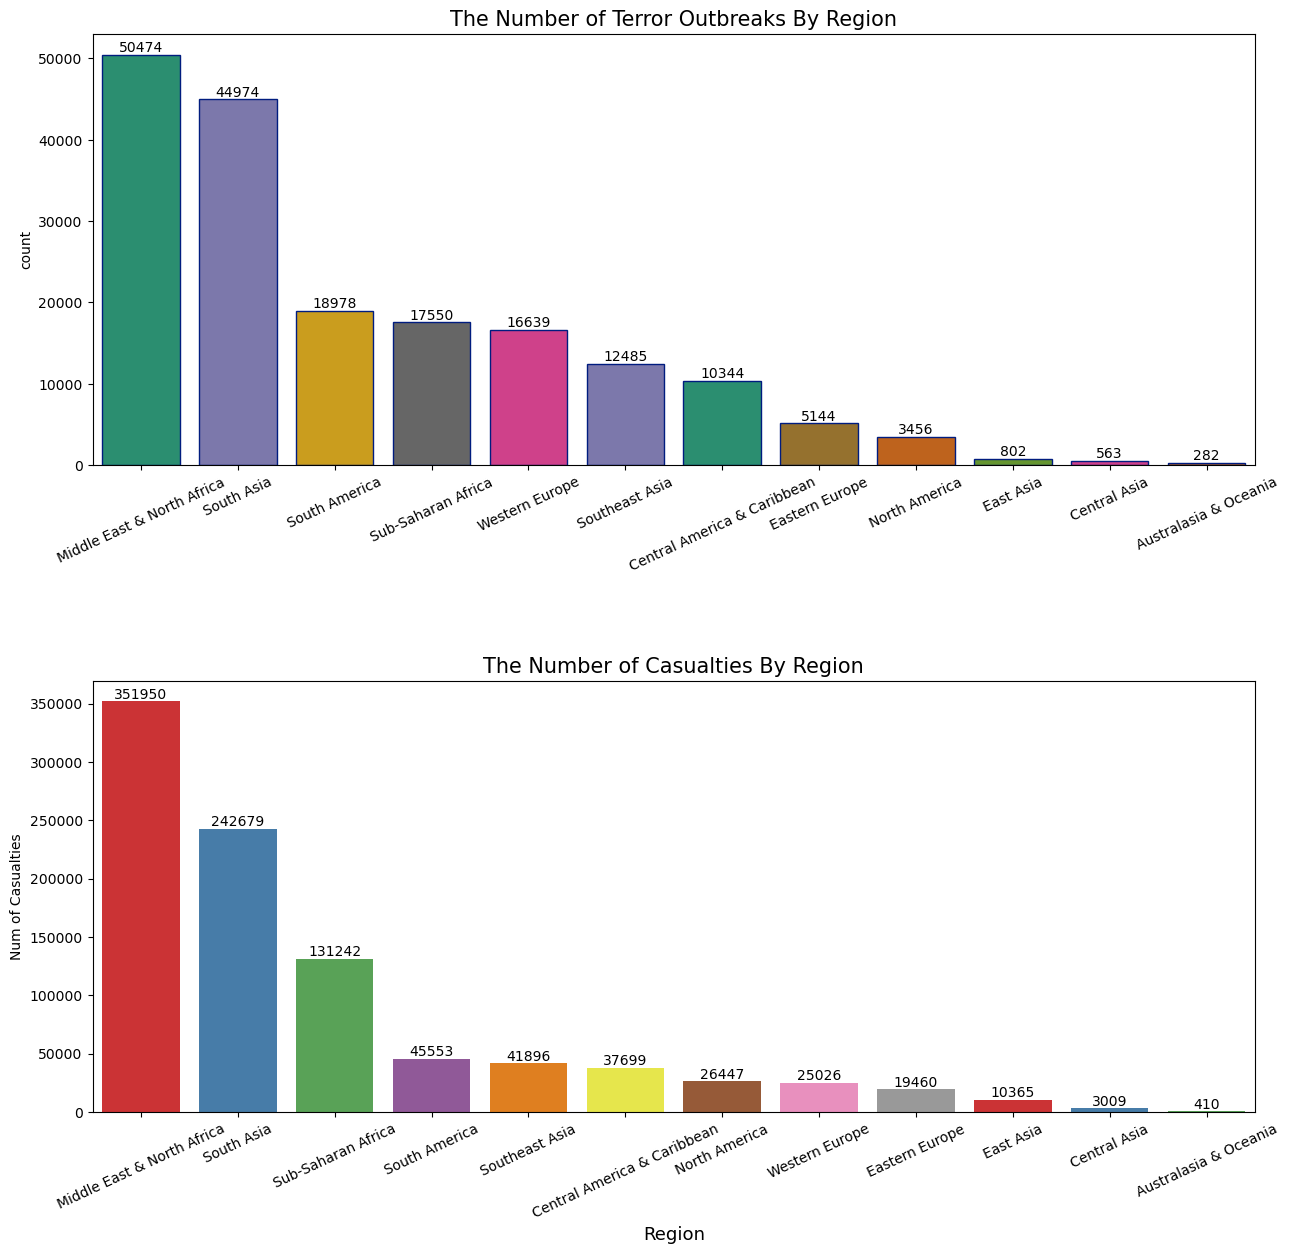

In [77]:
f, axs = plt.subplots(2, 1, figsize=(15,14))

ax1 = sns.countplot(
	x='Region', data=terror, hue='Region', legend=False, palette='Dark2',
	edgecolor=sns.color_palette('dark',10),
	order=terror['Region'].value_counts().index,
	ax=axs[0]
)
for p in ax1.patches:
    ax1.annotate(
		text=f'{p.get_height()}',
  		xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)

ax2 = sns.barplot(
	x='Region', y='Num of Casualties', data=cnt_casualties, ax=axs[1],
	hue='Region', label=False, palette='Set1'
)
for p in ax2.patches:
    ax2.annotate(
		text=f'{p.get_height()}',
  		xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
plt.subplots_adjust(hspace=0.5, wspace=0.6)
axs[0].set_title('The Number of Terror Outbreaks By Region', fontsize=15)
axs[0].set_xticklabels(terror['Region'].value_counts().index,rotation=25)
axs[0].set_xlabel('')
#axs[0].set_xticks([])
#axs[0].tick_params(rotation=25, labelsize=10)
axs[1].set_title('The Number of Casualties By Region', fontsize=15)
axs[1].set_xlabel('Region', fontsize=13)
axs[1].set_xticklabels(cnt_casualties.index,rotation=25)
plt.show()

-----

<br></br>

# 문제 5.

- 중동&북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제4번에 대해</br>
	문제1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해 보시오.

- 그리고 본인의 분석결과를 제시하시오

In [26]:
terror_date = terror[terror['year']>2012]
terror_date

,year,month,day,Region,Country,City,lat,lng,nkill,nwound,target_type,target,perp_group,attack_type,weapon,suicide,success,casualties
113299,2013,1,1,South Asia,Pakistan,Bannu,32.987347,70.602524,0,0,Police,Miryan Police Station,Unknown,Bombing/Explosion,Explosives,0,0,0
113300,2013,1,1,Middle East & North Africa,Iraq,Tuz Khormato,34.881348,44.625130,1,5,Private Citizens & Property,Civilians,Unknown,Bombing/Explosion,Explosives,0,1,6
113301,2013,1,1,Middle East & North Africa,Iraq,Tuz Khormato,34.881348,44.625130,0,5,Police,Police First Responders,Unknown,Bombing/Explosion,Explosives,0,1,5
113302,2013,1,1,Middle East & North Africa,Iraq,Kirkuk,35.452110,44.375465,0,2,Police,Patrol,Unknown,Bombing/Explosion,Explosives,0,1,2
113303,2013,1,1,South Asia,Pakistan,Karachi,24.891115,67.143311,0,0,Private Citizens & Property,Activist,Tehrik-i-Taliban Pakistan (TTP),Bombing/Explosion,Explosives,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Sub-Saharan Africa,Somalia,Ceelka Geelow,2.359673,45.385034,1,2,Military,Checkpoint,Al-Shabaab,Armed Assault,Firearms,0,1,3
181687,2017,12,31,Middle East & North Africa,Syria,Jableh,35.407278,35.942679,2,7,Military,Hmeymim Air Base,Muslim extremists,Bombing/Explosion,Explosives,0,1,9
181688,2017,12,31,Southeast Asia,Philippines,Kubentog,6.900742,124.437908,0,0,Private Citizens & Property,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Facility/Infrastructure Attack,Incendiary,0,1,0
181689,2017,12,31,South Asia,India,Imphal,24.798346,93.940430,0,0,Government (General),Office,Unknown,Bombing/Explosion,Explosives,0,0,0


In [27]:
terror_date['Date'] = pd.to_datetime(terror_date[['year', 'month', 'day']])
terror_date

C:\Users\happy\AppData\Local\Temp\ipykernel_21276\901296730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_date['Date'] = pd.to_datetime(terror_date[['year', 'month', 'day']])


,year,month,day,Region,Country,City,lat,lng,nkill,nwound,target_type,target,perp_group,attack_type,weapon,suicide,success,casualties,Date
113299,2013,1,1,South Asia,Pakistan,Bannu,32.987347,70.602524,0,0,Police,Miryan Police Station,Unknown,Bombing/Explosion,Explosives,0,0,0,2013-01-01
113300,2013,1,1,Middle East & North Africa,Iraq,Tuz Khormato,34.881348,44.625130,1,5,Private Citizens & Property,Civilians,Unknown,Bombing/Explosion,Explosives,0,1,6,2013-01-01
113301,2013,1,1,Middle East & North Africa,Iraq,Tuz Khormato,34.881348,44.625130,0,5,Police,Police First Responders,Unknown,Bombing/Explosion,Explosives,0,1,5,2013-01-01
113302,2013,1,1,Middle East & North Africa,Iraq,Kirkuk,35.452110,44.375465,0,2,Police,Patrol,Unknown,Bombing/Explosion,Explosives,0,1,2,2013-01-01
113303,2013,1,1,South Asia,Pakistan,Karachi,24.891115,67.143311,0,0,Private Citizens & Property,Activist,Tehrik-i-Taliban Pakistan (TTP),Bombing/Explosion,Explosives,0,0,0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Sub-Saharan Africa,Somalia,Ceelka Geelow,2.359673,45.385034,1,2,Military,Checkpoint,Al-Shabaab,Armed Assault,Firearms,0,1,3,2017-12-31
181687,2017,12,31,Middle East & North Africa,Syria,Jableh,35.407278,35.942679,2,7,Military,Hmeymim Air Base,Muslim extremists,Bombing/Explosion,Explosives,0,1,9,2017-12-31
181688,2017,12,31,Southeast Asia,Philippines,Kubentog,6.900742,124.437908,0,0,Private Citizens & Property,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Facility/Infrastructure Attack,Incendiary,0,1,0,2017-12-31
181689,2017,12,31,South Asia,India,Imphal,24.798346,93.940430,0,0,Government (General),Office,Unknown,Bombing/Explosion,Explosives,0,0,0,2017-12-31


In [33]:
tmp = terror_date.groupby(terror_date['Date'].dt.to_period('M'))['Region'].value_counts().reset_index(name='Attack Count')
tmp

,Date,Region,Attack Count
0,2013-01,South Asia,398
1,2013-01,Middle East & North Africa,208
2,2013-01,Sub-Saharan Africa,83
3,2013-01,Southeast Asia,64
4,2013-01,Western Europe,33
...,...,...,...
583,2017-12,Western Europe,21
584,2017-12,Eastern Europe,9
585,2017-12,South America,8
586,2017-12,North America,5


In [38]:
terror_date['Date'] = terror_date['year'].astype(str) + '-' + terror_date['month'].astype(str)

# Date형으로 변환
terror_date['Date'] = pd.to_datetime(terror_date['Date'], format='%Y-%m')
terror_date

C:\Users\happy\AppData\Local\Temp\ipykernel_21276\299714375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_date['Date'] = terror_date['year'].astype(str) + '-' + terror_date['month'].astype(str)
C:\Users\happy\AppData\Local\Temp\ipykernel_21276\299714375.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_date['Date'] = pd.to_datetime(terror_date['Date'], format='%Y-%m')


,year,month,day,Region,Country,City,lat,lng,nkill,nwound,target_type,target,perp_group,attack_type,weapon,suicide,success,casualties,Date
113299,2013,1,1,South Asia,Pakistan,Bannu,32.987347,70.602524,0,0,Police,Miryan Police Station,Unknown,Bombing/Explosion,Explosives,0,0,0,2013-01-01
113300,2013,1,1,Middle East & North Africa,Iraq,Tuz Khormato,34.881348,44.625130,1,5,Private Citizens & Property,Civilians,Unknown,Bombing/Explosion,Explosives,0,1,6,2013-01-01
113301,2013,1,1,Middle East & North Africa,Iraq,Tuz Khormato,34.881348,44.625130,0,5,Police,Police First Responders,Unknown,Bombing/Explosion,Explosives,0,1,5,2013-01-01
113302,2013,1,1,Middle East & North Africa,Iraq,Kirkuk,35.452110,44.375465,0,2,Police,Patrol,Unknown,Bombing/Explosion,Explosives,0,1,2,2013-01-01
113303,2013,1,1,South Asia,Pakistan,Karachi,24.891115,67.143311,0,0,Private Citizens & Property,Activist,Tehrik-i-Taliban Pakistan (TTP),Bombing/Explosion,Explosives,0,0,0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Sub-Saharan Africa,Somalia,Ceelka Geelow,2.359673,45.385034,1,2,Military,Checkpoint,Al-Shabaab,Armed Assault,Firearms,0,1,3,2017-12-01
181687,2017,12,31,Middle East & North Africa,Syria,Jableh,35.407278,35.942679,2,7,Military,Hmeymim Air Base,Muslim extremists,Bombing/Explosion,Explosives,0,1,9,2017-12-01
181688,2017,12,31,Southeast Asia,Philippines,Kubentog,6.900742,124.437908,0,0,Private Citizens & Property,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Facility/Infrastructure Attack,Incendiary,0,1,0,2017-12-01
181689,2017,12,31,South Asia,India,Imphal,24.798346,93.940430,0,0,Government (General),Office,Unknown,Bombing/Explosion,Explosives,0,0,0,2017-12-01


<function matplotlib.pyplot.show(close=None, block=None)>

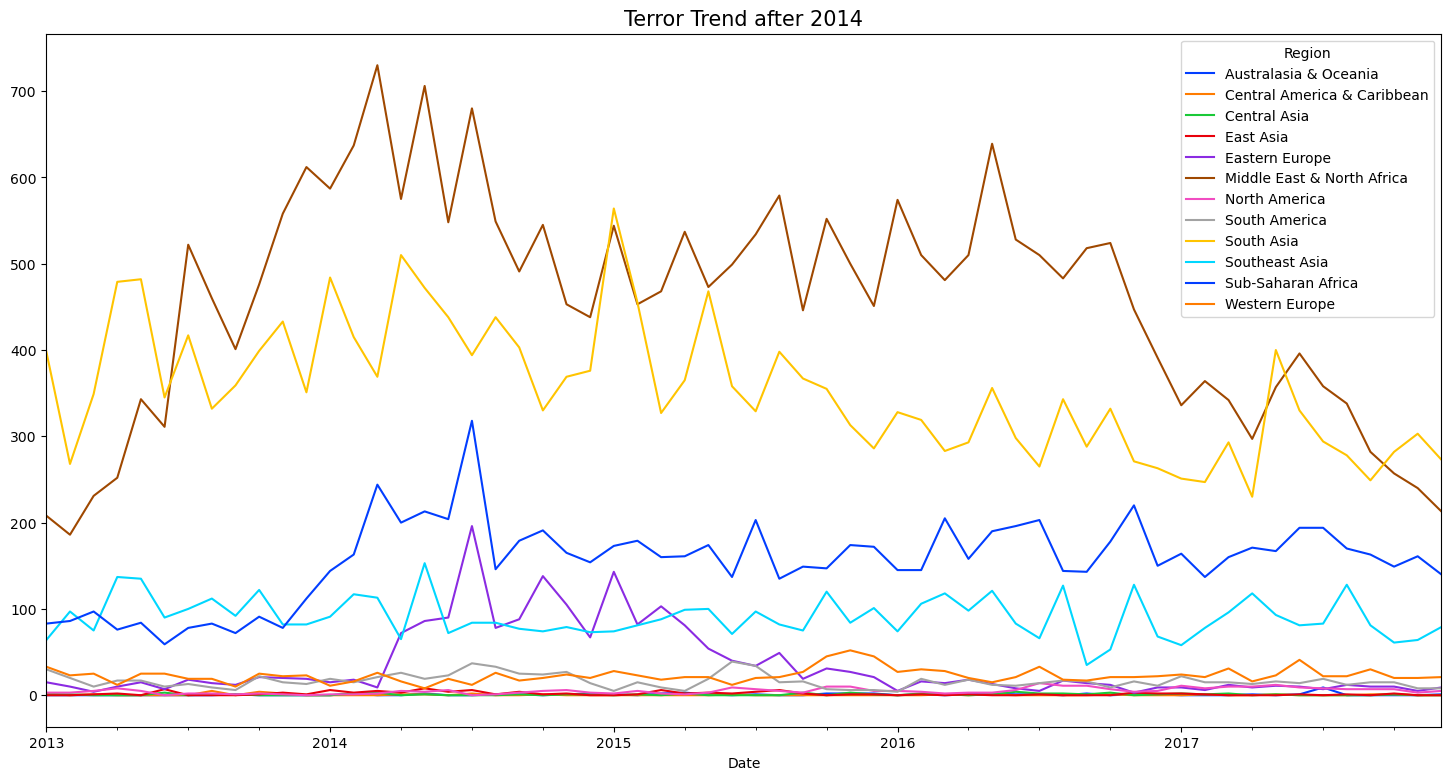

In [41]:
pd.crosstab(terror_date.Date, terror_date.Region).plot(color=sns.color_palette('bright',12))
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.title("Terror Trend after 2014", fontsize=15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

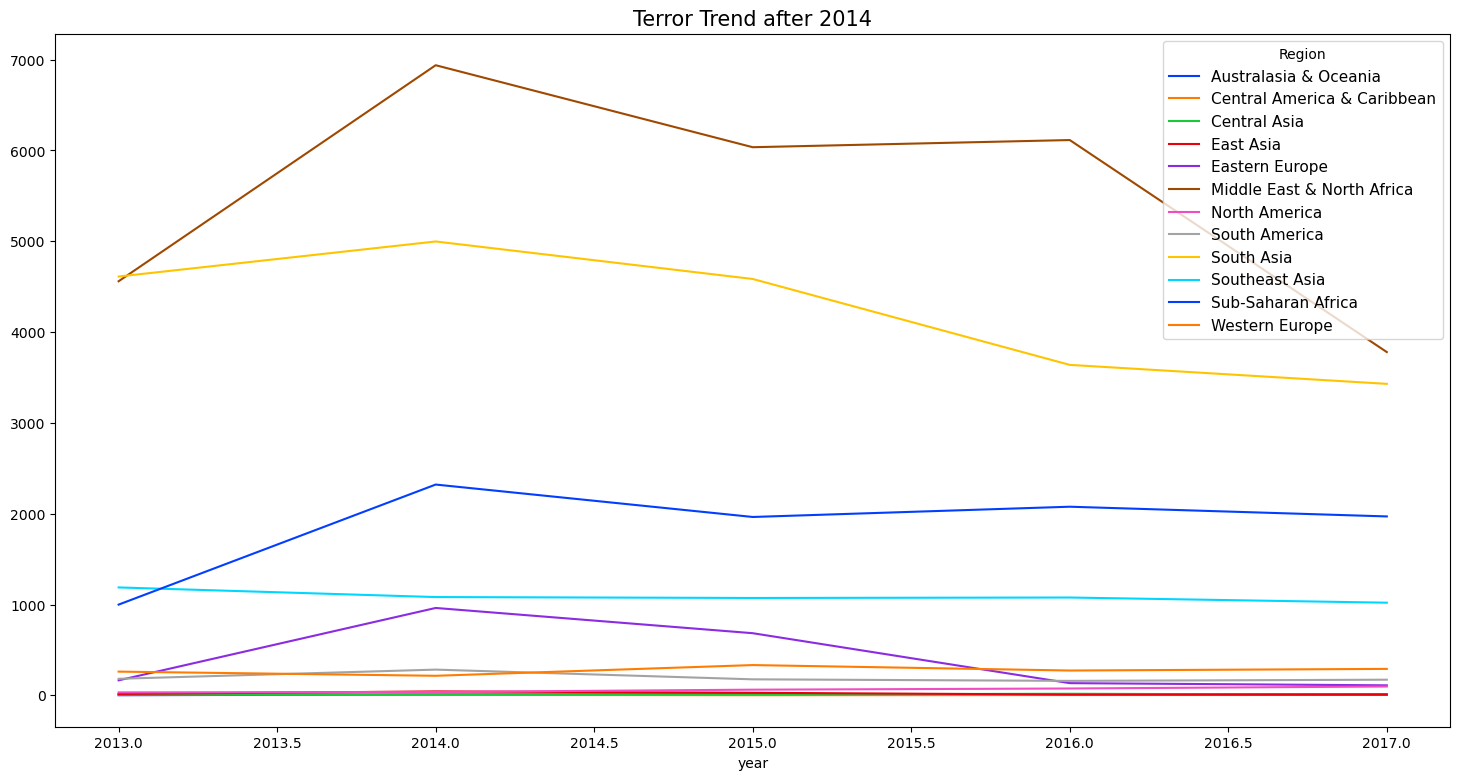

In [42]:
pd.crosstab(terror_date.year, terror.Region).plot(color=sns.color_palette('bright',12))
fig = plt.gcf()
fig.set_size_inches(18,9)
plt.title("Terror Trend after 2014", fontsize=15)
plt.legend(title='Region', fontsize=11)
plt.show()

-----

<br></br>

# 문제 6.

- 중동&북아프리카, 남아시아, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여</br>
	70년대, 80년대, 90년대, 2000년대, 2010년대로 구분하여 특성을 분석해 보시오.

In [63]:
def trans_years(x):
    if x >= 1970 and x < 1980:
        return 1970
    elif x >= 1980 and x < 1990:
        return 1980
    elif x >= 1990 and x < 2000:
        return 1990
    elif x >= 2000 and x < 2010:
        return 2000
    else:
        return 2010    

terror['Years'] = terror['year'].apply(trans_years)
terror

,year,month,day,Region,Country,City,lat,lng,nkill,nwound,target_type,target,perp_group,attack_type,weapon,suicide,success,casualties,Years
0,1970,7,2,Central America & Caribbean,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,0,Private Citizens & Property,Julio Guzman,MANO-D,Assassination,Unknown,0,1,1,1970
1,1970,0,0,North America,Mexico,Mexico city,19.371887,-99.086624,0,0,Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Hostage Taking (Kidnapping),Unknown,0,1,0,1970
2,1970,1,0,Southeast Asia,Philippines,Unknown,15.478598,120.599741,1,0,Journalists & Media,Employee,Unknown,Assassination,Unknown,0,1,1,1970
3,1970,1,0,Western Europe,Greece,Athens,37.997490,23.762728,0,0,Government (Diplomatic),U.S. Embassy,Unknown,Bombing/Explosion,Explosives,0,1,0,1970
4,1970,1,0,East Asia,Japan,Fukouka,33.580412,130.396361,0,0,Government (Diplomatic),U.S. Consulate,Unknown,Facility/Infrastructure Attack,Incendiary,0,1,0,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Sub-Saharan Africa,Somalia,Ceelka Geelow,2.359673,45.385034,1,2,Military,Checkpoint,Al-Shabaab,Armed Assault,Firearms,0,1,3,2010
181687,2017,12,31,Middle East & North Africa,Syria,Jableh,35.407278,35.942679,2,7,Military,Hmeymim Air Base,Muslim extremists,Bombing/Explosion,Explosives,0,1,9,2010
181688,2017,12,31,Southeast Asia,Philippines,Kubentog,6.900742,124.437908,0,0,Private Citizens & Property,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Facility/Infrastructure Attack,Incendiary,0,1,0,2010
181689,2017,12,31,South Asia,India,Imphal,24.798346,93.940430,0,0,Government (General),Office,Unknown,Bombing/Explosion,Explosives,0,0,0,2010


In [64]:
pd.crosstab(terror.Years, terror.Region)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Years,,,,,,,,,,,,
1970,16,918,0,78,26,1090,1596,1009,51,194,242,4694
1980,78,7490,0,110,43,2883,558,9698,2871,1086,1576,4767
1990,113,1847,335,416,1062,5423,654,5763,4840,1643,2688,3978
2000,28,59,148,88,1326,8113,270,1149,8026,2707,1720,1406
2010,47,30,80,110,2687,32965,378,1359,29186,6855,11324,1794


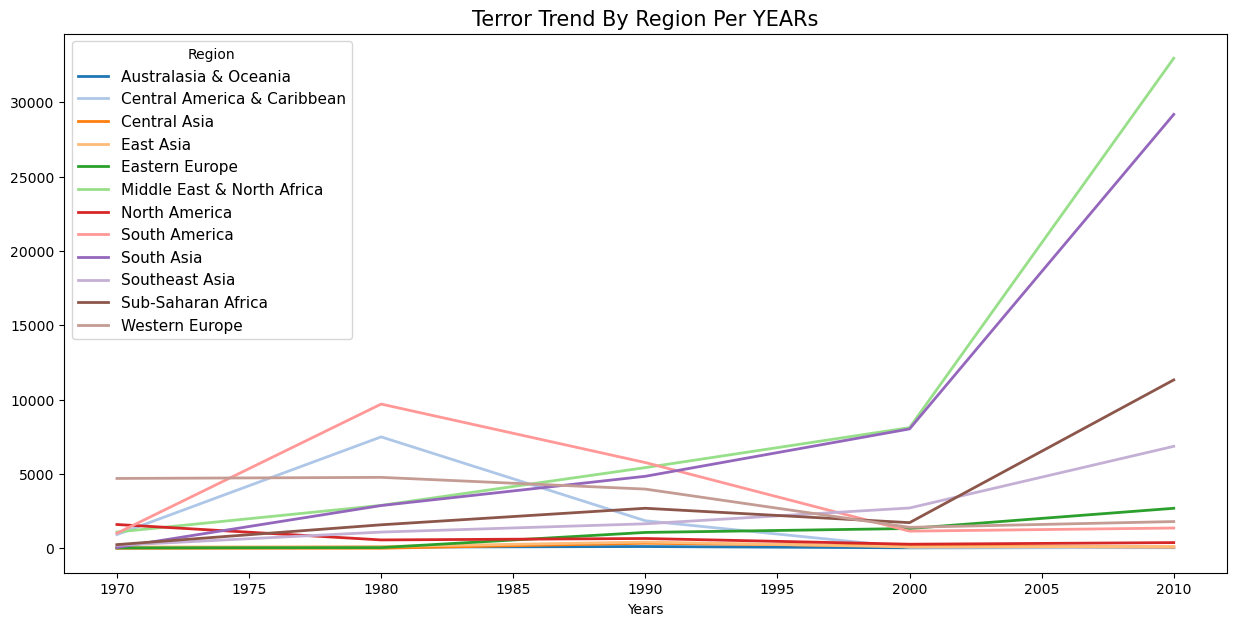

In [70]:
pd.crosstab(terror.Years, terror.Region).plot(color=sns.color_palette('tab20',12), lw=2)
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title("Terror Trend By Region Per YEARs", fontsize=15)
plt.legend(title='Region', fontsize=11)
plt.show()


- 80년대에 남아메리카와 중앙아메리카 지역에서 주로 테러가 발생하였다.

- 중동&북아프리카와 남아시아, 그리고 사하라 사막 이남의 아프리카 지역에서 2000년대를 기점으로 가파르게 상승하는 것을 볼 수 있다.

In [ ]:
len(terror['perp_group'].unique())

3537

In [ ]:
top10_group = terror[terror['perp_group'].isin(terror['perp_group'].value_counts()[1:11].index)]

In [ ]:
trend_group = pd.crosstab(top10_group.year, top10_group.perp_group)

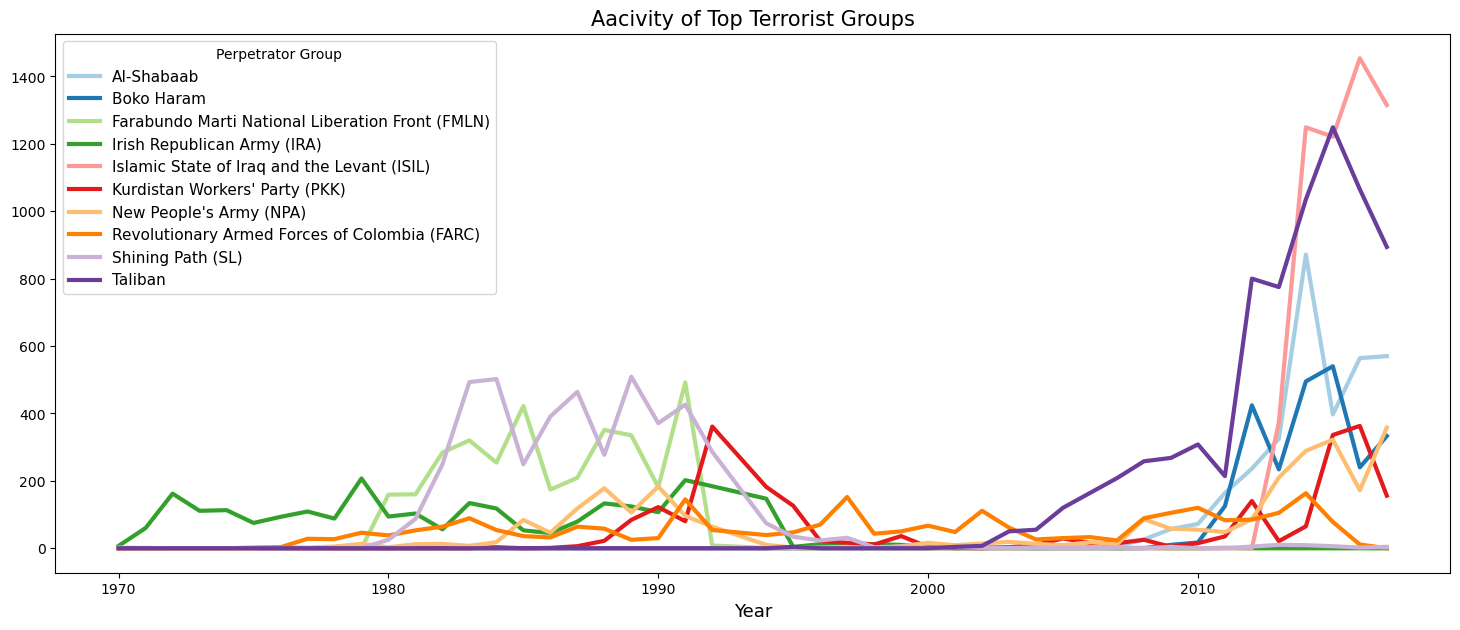

In [ ]:
trend_group.plot(color=sns.color_palette('Paired'), lw=3)
fig = plt.gcf()
fig.set_size_inches(18,7)
plt.legend(title='Perpetrator Group', fontsize=11)
plt.title("Aacivity of Top Terrorist Groups", fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.show()

- Irish Republican Army(IRA)는 70년대에 활동했던 가장 오래된 테러 단체로 보인다.</br>
	90년대 중반까지 활동하다가 그 이후 거의 활동을 하지 않는 것으로 보인다.

- 80년대에 Shining Path (SL)과 FMLN 단체가 활발히 활동했는데 </br>
	위 지역별 그래프와 같이 보면 80년대에 남아메리카와 중앙아메리카 지역에서의 테러 발생 증가에 영향을 준 단체로 보여진다.

- 2010년 이후부터 활동이 급증한 ISIL, Taliban, Al-Shabaab, 등은 </br>
	위 지역별 그래프의 2000년대 이후 중동&북아프리카와 남아시아, 그리고 사하라 사막 이남의 아프리카 지역에서 급증과 연관이 있어 보인다.

- 1번 문제에서 테러 발생 피크를 보였던 2014년에 대해 조사한 결과과 부합함을 볼 수 있다.

-----

<br></br>

# 문제 7.

- 우리나라의 테러를 집계해서 나름대로의 방법으로 시각화 및 분석을 수행하시오.

In [78]:
terror_kor = terror[terror['Country']=='South Korea']
terror_kor

,year,month,day,Region,Country,City,lat,lng,nkill,nwound,target_type,target,perp_group,attack_type,weapon,suicide,success,casualties,Years
2514,1974,8,15,East Asia,South Korea,Seoul,37.566535,126.977969,1,0,Government (General),"wife, Pres. Chung Hu Park",Korean Youth League,Assassination,Firearms,0,1,1,1970
15734,1982,3,18,East Asia,South Korea,Busan,35.179554,129.075642,1,3,Government (Diplomatic),US Government Information Office,Unknown,Facility/Infrastructure Attack,Incendiary,0,1,4,1980
19820,1983,9,22,East Asia,South Korea,Daegu,35.871435,128.601445,1,4,Government (Diplomatic),US Cultural Center (housed in a 5 story building),Unknown,Bombing/Explosion,Explosives,0,1,5,1980
29151,1986,9,14,East Asia,South Korea,Gimpo International Airport,37.558947,126.798341,5,19,Airports & Aircraft,Kimpo International Airport,Unknown,Bombing/Explosion,Explosives,0,1,24,1980
29696,1986,12,15,East Asia,South Korea,Busan,35.179554,129.075642,0,11,Government (General),US Information Svce Bldg,Student Radicals,Armed Assault,Melee,0,1,11,1980
33678,1988,3,4,East Asia,South Korea,Busan,35.179554,129.075642,0,0,Business,Angel Coffee Shop,Unknown,Bombing/Explosion,Explosives,0,1,0,1980
33835,1988,3,18,East Asia,South Korea,Seoul,37.566535,126.977969,0,0,Military,U.S. Engineering Unit,Unknown,Facility/Infrastructure Attack,Incendiary,0,1,0,1980
34532,1988,5,23,East Asia,South Korea,Gwangju,35.159545,126.852601,0,0,Government (Diplomatic),U.S. Information Service,Unknown,Facility/Infrastructure Attack,Incendiary,0,1,0,1980
34562,1988,5,26,East Asia,South Korea,Seoul,37.566535,126.977969,0,0,Business,Bank,Unknown,Facility/Infrastructure Attack,Incendiary,0,1,0,1980
34737,1988,6,13,East Asia,South Korea,Daegu,35.871435,128.601445,0,0,Government (Diplomatic),U.S. Cultural Center,Unknown,Facility/Infrastructure Attack,Incendiary,0,1,0,1980


◾ 주요 공격 형태

◾ 시대별 테러 발생 수

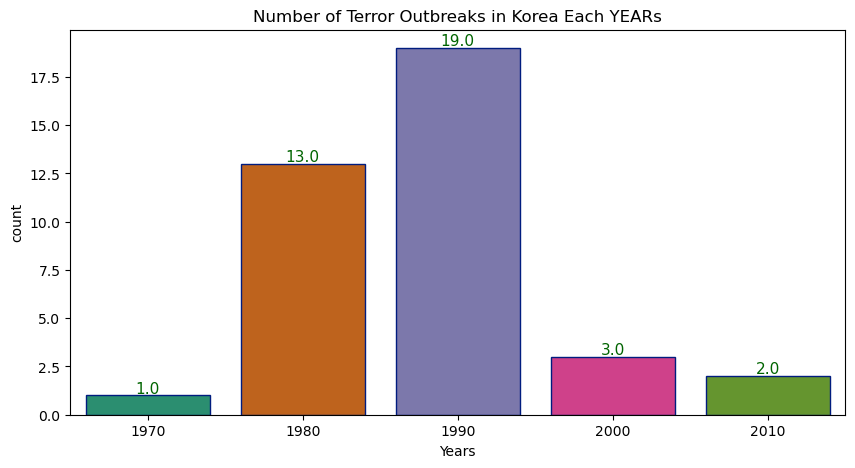

In [83]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=terror_kor, x='Years', hue='Years', legend=False, palette='Dark2', edgecolor=sns.color_palette('dark',5))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2., p.get_height()),
		xytext=(0,5), ha='center', va='center', textcoords='offset points', fontsize=11, color='darkgreen'
	)
plt.title('Number of Terror Outbreaks in Korea Each YEARs')
plt.show()

◾ 시대별 사상자 수

In [84]:
cnt_df = terror_kor['Years'].value_counts().to_frame()
cnt_df.columns = ['Attacks']
cnt_df

,Attacks
Years,
1990,19
1980,13
2000,3
2010,2
1970,1


In [85]:
kill_df = terror_kor.groupby('Years')['nkill'].sum().to_frame()
kill_df.columns = ['Killed']
kill_df

,Killed
Years,
1970,1
1980,7
1990,2
2000,0
2010,0


In [86]:
wound_df = terror_kor.groupby('Years')['nwound'].sum().to_frame()
wound_df.columns = ['Wounded']
wound_df

,Wounded
Years,
1970,0
1980,37
1990,33
2000,63
2010,1


In [89]:
kor_df = wound_df.merge(kill_df, left_index=True, right_index=True, how='left')
kor_df['Casualties'] = kor_df['Wounded'] + kor_df['Killed']
kor_df = kor_df.merge(cnt_df, left_index=True, right_index=True, how='left')
kor_df

,Wounded,Killed,Casualties,Attacks
Years,,,,
1970,0,1,1,1
1980,37,7,44,13
1990,33,2,35,19
2000,63,0,63,3
2010,1,0,1,2


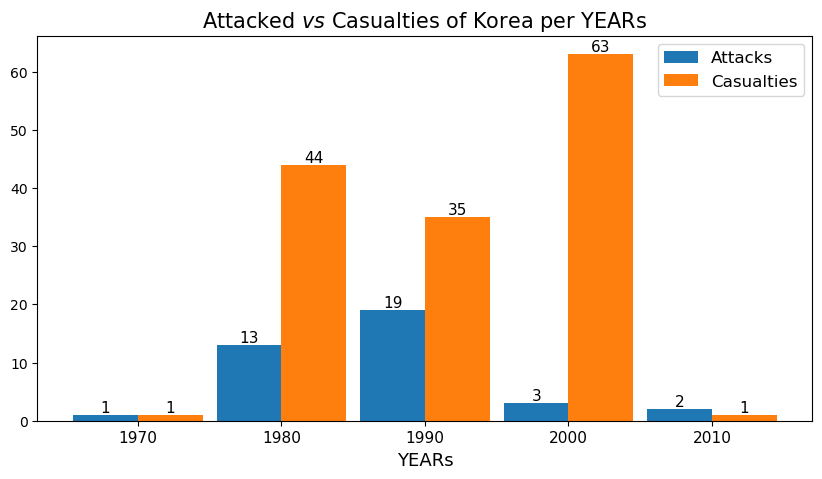

In [91]:
ax = kor_df[['Attacks', 'Casualties']].plot.bar(width=0.9, color=sns.color_palette('tab10'))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title("Attacked $vs$ Casualties of Korea per YEARs", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("YEARs", fontsize=13)
plt.xticks(rotation=0, fontsize=11)
plt.show()

- <참고>

1974년 8월 15일 한국의 테러 사건으로는 "1974년 8월 15일 자유한국당 대회 폭탄 테러 사건"이 있습니다. 이 사건은 대한민국 서울특별시 중구 남대문시장 앞 자유한국당 대회장에서 발생했습니다. 이 사건은 당시 대한민국 대통령이었던 박정희 대통령이 총선거를 앞두고 8월 15일 임시 국회에서 참석하여 연설하는 자리에서 발생한 폭탄 테러입니다.

이 사건에서 1974년 8월 15일 오후 7시 40분쯤, 대회장으로부터 약 30m 떨어진 곳에 위치한 화장실에서 폭탄이 폭발했습니다. 이 사건으로 6명이 사망하고 17명이 부상을 입었습니다. 사망자 중에는 1972년 무등산 헬기 추락사고로 생존한 적 있는 박원순도 포함되어 있습니다. 이 사건은 당시의 정치적인 분위기와 관련하여 여러 가설과 의혹이 제기되었지만, 여전히 명백한 해결이 이뤄지지는 않았습니다.

---

2003년 11월 7일 부산에서 발생한 테러 사건은 "2003년 부산 서부구치소 죄수 살인사건"입니다. 이 사건은 2003년 11월 7일 새벽, 부산 서부구치소에서 발생했습니다.

해당 사건에서 수감 중이던 무기단속법 위반자인 강탈남이 간수들을 습격하여 경비원과 관리소장을 포함한 16명을 살해한 사건입니다. 이 사건은 국내 테러라기보다는 교도소 내 폭동에 가까운 사건으로 분류되지만, 대규모의 살인과 폭력으로 인한 사회적 충격을 일으켰습니다.

이 사건으로 많은 사회적 논란이 일어났으며, 교도소 내부의 안전 및 감시 시스템에 대한 개선과 함께 범죄자들의 교도 및 재활에 대한 사회적 관심이 높아졌습니다.

- 70년대에 기록된 한 건의 1974년 8월 15일 박정희 대통령의 암살을 시도한 대통령 암살 미수 사건이자 영부인 육영수 여사가 살해당한 전대미문의 사건이다.

- 70년대를 조사 하다가 알게된 테러가 있었다.

	- 동일한 날에 발생한 1974년 8월 15일 자유한국당 대회 폭탄 테러 사건이다.</br>
		육영수 여사의 암살 서건에 가려진 것일까?? 이 사건으로 6명이 사망하고 17명이 부상을 입었는데도 기록에는 빠져있다.

- 2000년대에는 3건의 테러가 있었는데 60명이 넘는 사상자가 났다. 무슨일이 있었던 것일까??

- 2003년 11월 7일 부산에서 "부산 서부구치소 죄수 살인사건"이 있었다.<br>
	수감자가 총기를 탈취해 간수들을 습격하여 경비원과 관리소장을 포함한 16명을 살해한 사건으로 나와 있다.</br>
	여기도 기록엔 부상자 60명으로 되어 있는 데 실제로는 사망자도 있었던 것 같다.

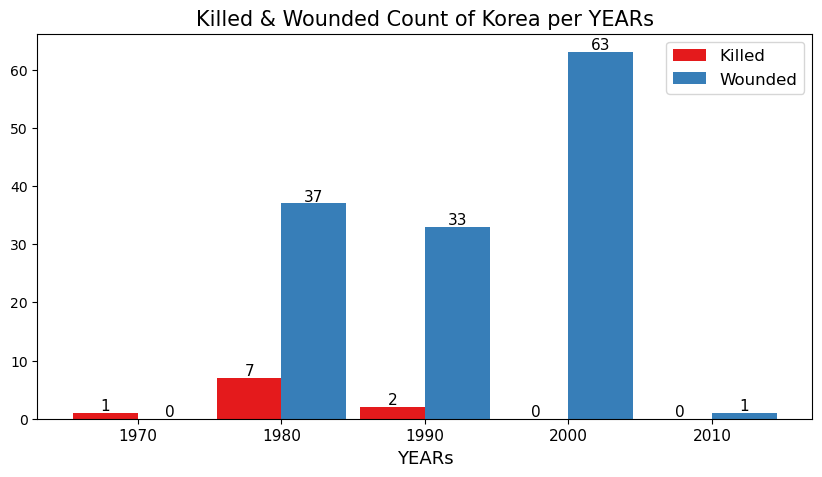

In [93]:
ax = kor_df[['Killed','Wounded']].plot.bar(width=0.9, color=sns.color_palette('Set1'))
for p in ax.patches:
    ax.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title("Killed & Wounded Count of Korea per YEARs", fontsize=15)
plt.legend(fontsize=12)
plt.xlabel("YEARs", fontsize=13)
plt.xticks(rotation=0, fontsize=11)
plt.show()

#### 👉 우리나라는 사망자 수가 많지 않다.

- 중동의 이라크나 파키스탄과 같이 극단적인 나라들과 비교하면 참 다행서런 수치로 보여진다.

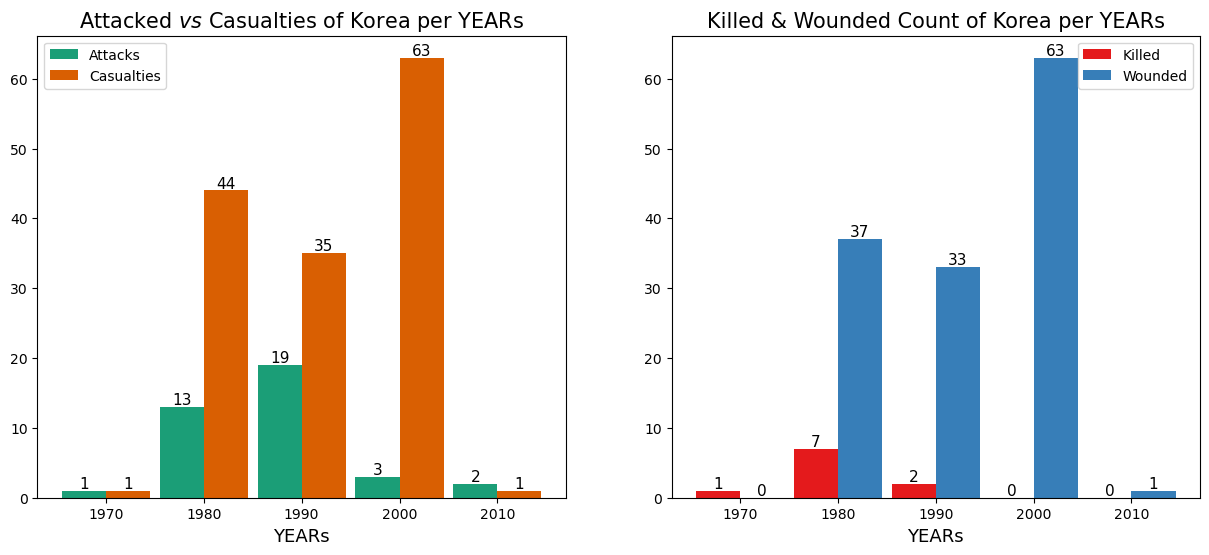

In [97]:
f, axs = plt.subplots(1, 2, figsize=(15,6))

ax1 = kor_df[['Attacks', 'Casualties']].plot.bar(width=0.9, color=sns.color_palette('Dark2'), ax=axs[0])
for p in ax1.patches:
    ax1.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)

ax2 = kor_df[['Killed','Wounded']].plot.bar(width=0.9, color=sns.color_palette('Set1'), ax=axs[1])
for p in ax2.patches:
    ax2.annotate(
		text=f"{p.get_height()}", xy=(p.get_x()+p.get_width()/2, p.get_height()), xytext=(0,5),
		ha='center', va='center', textcoords='offset points', fontsize=11
	)

#plt.subplots_adjust(hspace=0.5, wspace=0.1)

axs[0].set_title("Attacked $vs$ Casualties of Korea per YEARs", fontsize=15)
axs[0].set_xlabel("YEARs", fontsize=13)
axs[0].set_xticklabels(kor_df.index, rotation=0)
#axs[0].set_xticks([])
#axs[0].tick_params(rotation=25, labelsize=10)

axs[1].set_title("Killed & Wounded Count of Korea per YEARs", fontsize=15)
axs[1].set_xlabel("YEARs", fontsize=13)
axs[1].set_xticklabels(kor_df.index, rotation=0)

plt.show()

-----

<br></br>

# 문제 8.

- 불특정 민간인을 대상으로 한 테러는 “악”이라고 할 수 있습니다.

- 이런 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를 분석하고 시각화하여 제시하시오.

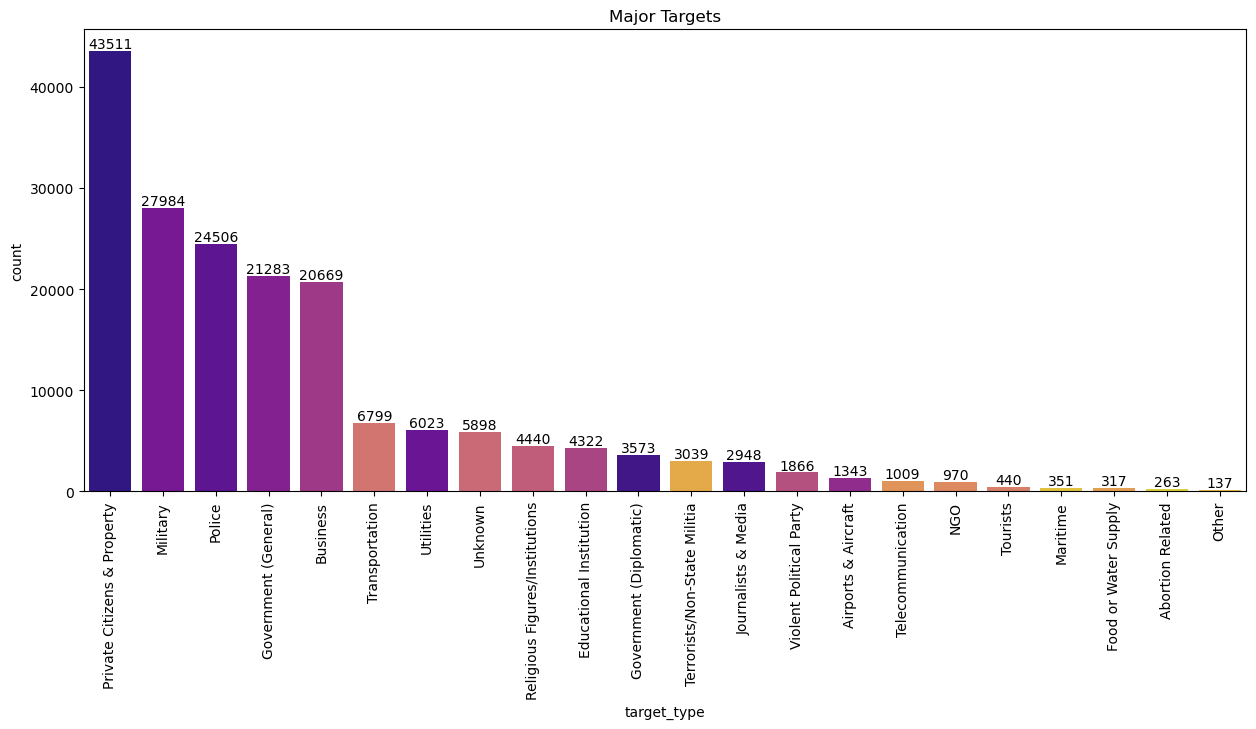

In [79]:
plt.figure(figsize=(15,6))
ax = sns.countplot(
	x='target_type', data=terror,
	hue='target_type', legend=False, palette='plasma',
	order=terror['target_type'].value_counts().index
)
for p in ax.patches:
    ax.annotate(
		f'{int(p.get_height())}',
  		(p.get_x() + p.get_width() / 2., p.get_height()), 
    	ha='center', va='center', xytext=(0, 5), textcoords='offset points'
	)
    
plt.xticks(rotation=90)
plt.title("Major Targets")
plt.show()

#### 👉 주요 타겟이 민간인??

- 타겟 유형에서 가장 많은 빈도수를 차지하는 것이 민간인과 개인재산이다.

- 그 다음인 군대와 수치적인 차이가 많이 난다는 점이 좀 놀랍기도 하다.

- 그렇다면 민간인의 사상자 수는 전체 대비 얼마나 될까?

In [101]:
target_type = terror.groupby('target_type')['casualties'].sum().to_frame()
target_type.sort_values(by='casualties', ascending=False, inplace=True)
target_type

,casualties
target_type,
Private Citizens & Property,319175
Military,177085
Police,118407
Business,78018
Government (General),67255
Transportation,54595
Religious Figures/Institutions,37890
Terrorists/Non-State Militia,17311
Educational Institution,13972


In [102]:
target_type['casualties'].sum()

935736

In [103]:
terror['casualties'].sum()

935736

In [104]:
target_type_10 = target_type[:10]
target_type_10

,casualties
target_type,
Private Citizens & Property,319175
Military,177085
Police,118407
Business,78018
Government (General),67255
Transportation,54595
Religious Figures/Institutions,37890
Terrorists/Non-State Militia,17311
Educational Institution,13972


In [108]:
target_type_10['Ratio'] = target_type_10['casualties']/target_type['casualties'].sum() * 100
target_type_10

C:\Users\happy\AppData\Local\Temp\ipykernel_21276\110561090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_type_10['Ratio'] = target_type_10['casualties']/target_type['casualties'].sum() * 100


,casualties,Ratio
target_type,,
Private Citizens & Property,319175,34.109514
Military,177085,18.924675
Police,118407,12.653890
Business,78018,8.337608
Government (General),67255,7.187390
Transportation,54595,5.834445
Religious Figures/Institutions,37890,4.049219
Terrorists/Non-State Militia,17311,1.849988
Educational Institution,13972,1.493156


In [106]:
target_type_10['Ratio'].values

array([34.1, 18.9, 12.7,  8.3,  7.2,  5.8,  4. ,  1.8,  1.5,  1.4])

In [107]:
target_type_10.index

Index(['Private Citizens & Property', 'Military', 'Police', 'Business',
       'Government (General)', 'Transportation',
       'Religious Figures/Institutions', 'Terrorists/Non-State Militia',
       'Educational Institution', 'Government (Diplomatic)'],
      dtype='object', name='target_type')

- 참고

	- https://wikidocs.net/92114

	- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

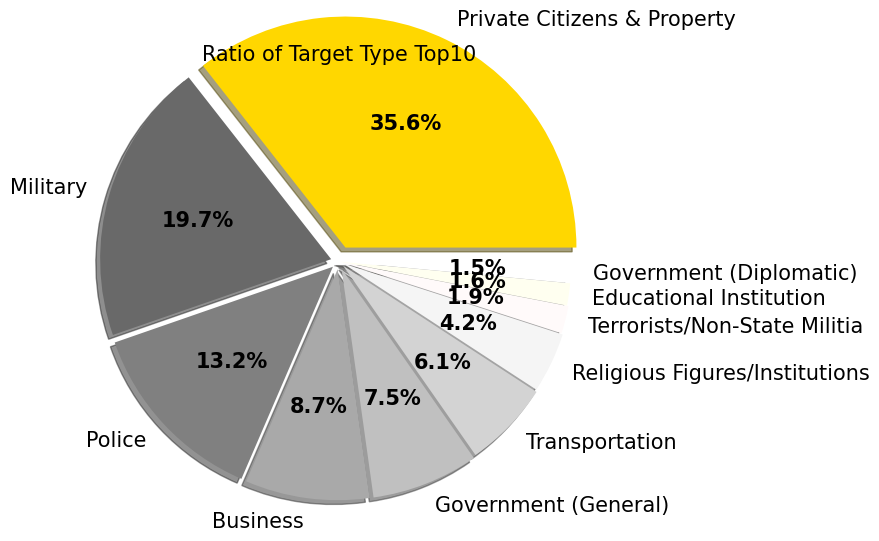

In [127]:
explode = [0.1, 0.051, 0.051, 0.051, 0.051, 0.04, 0.03, 0.02, 0.01, 0]
colors = ['gold', 'dimgray', 'gray', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'snow', 'ivory', 'w']

fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect='equal'))

wedges, texts, autotexts = ax.pie(
	target_type_10['Ratio'].values, labels=target_type_10.index, autopct='%.1f%%',
	explode=explode, shadow=True, colors=colors, radius=1.5,
); # textprops=dict(color='maroon', size=12) --> 파이 전체 글자 반영

plt.setp(autotexts, size=15, weight="bold") #--> 파이 내 글자
ax.set_title('Ratio of Target Type Top10', fontsize=15)
plt.show()